# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [163]:
import math
import sys

In [164]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model


from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [165]:
# YOUR CODE HERE

# load data
wine = pd.read_csv('wine_quality_white.tsv', sep='\t')
wine

# random sample of 10 rows
wine_random_sample_10 = wine.sample(10)
wine_random_sample_10

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
2387,6.9,0.30,0.30,1.30,0.053,24.0,186.0,0.99361,3.29,0.54,9.90,4
2508,6.6,0.26,0.25,11.60,0.045,45.0,178.0,0.99691,3.33,0.43,9.80,6
3541,8.1,0.26,0.27,4.30,0.030,43.0,123.0,0.99212,3.16,0.33,11.20,6
3427,5.8,0.24,0.26,10.05,0.039,63.0,162.0,0.99375,3.33,0.50,11.20,6
4184,6.4,0.33,0.28,4.00,0.040,24.0,81.0,0.99030,3.26,0.64,12.60,7
2729,6.5,0.29,0.31,1.70,0.035,24.0,79.0,0.99053,3.27,0.69,11.40,7
2683,7.1,0.31,0.17,1.00,0.042,21.0,144.0,0.99304,3.13,0.40,9.60,5
4572,5.6,0.22,0.32,1.20,0.024,29.0,97.0,0.98823,3.20,0.46,13.05,7
3617,7.0,0.29,0.33,0.90,0.041,20.0,117.0,0.99048,3.21,0.50,11.40,5
4461,7.7,0.28,0.24,2.40,0.044,29.0,157.0,0.99312,3.27,0.56,10.60,6


For this project, I chose the Wine Quality dataset. The random 10 samples are shown above.

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [166]:
# YOUR CODE HERE
first_10_columns = wine.columns[:10]
first_10_columns

wine[first_10_columns].describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000


In [167]:
wine[first_10_columns].var()

fixed acidity              0.712114
volatile acidity           0.010160
citric acid                0.014646
residual sugar            25.725770
chlorides                  0.000477
free sulfur dioxide      289.242720
total sulfur dioxide    1806.085491
density                    0.000009
pH                         0.022801
sulphates                  0.013025
dtype: float64

1) Fixed acidity: This is a numeric column with no missing values. The values range from 3.8 to 14.2. With a variance of approximately 0.712, values vary within a reasonable range. This refers to the concentration of non-volatile acids in the wine, such as citric acid, that contribute to its overall taste and quality. 

2) Volatile acidity: This is a numeric column with no missing values. The values range from 0.08 to 1.1. The variance is about 0.01. As the name suggests, this refers to the concentration of volatile acids in the wine. These acids contribute to a vinegary smell when present in high concentrations. 

3) Citric acid: This is a numeric column with no missing values. The values range from 0 to 1.66 with a variance of about 0.015, similar to volatile acidity. This refers to the concentration of citric acid in the wine which contributes to its taste. With its relation to fixed acidity, a fair assumption is that fixed acidity and citric acid are positively correlated. 

4) Residual sugar: This is a numeric column with no missing values. The values range from 0.6 to 65.8. With this larger range, it's expected that its variance is on the higher end (~25.726). This refers to the amounnt of sugar left after fermentation. Naturally, the higher the amount, the sweeter the wine. 

5) Chlorides: This is a numeric column with no missing values. The values range from 0.009 to 0.346 with a relative low variance of 0.000477. Chlorides, which are the mineral salts in the wine, contribute to its level of saltiness. 

6) Free sulfur dioxide: This is a numeric column with no missing values. The values range from 2 to 289 with a variance of approximately 289.243. Considering that the standard deviation is about 17 with a mean of about 35, this high variance makes it safe to assume that there might be an outlier present. This refers to the antioxidant and antimicrobial agent present in wines that act as preservative.

7) Total sulfur dioxide: This is a numeric column with no missing values. The values range from 9 to 440 with a variance of 1806 which is even higher than free sulfur oxide. The max value might also be an outlier in this case and most likely connected to the same outlier sample from the free sulfur dioxide data. This refers to the overall amount of sulfur dioxide in the wine, including the free SO2 and the bound SO2. 

8) Density: This is a numeric column with no missing values. The values range from 0.987 to 1.039 with a variance of 0.000009. This extremly low variance reveals that wine density hardly vary from wine to wine. 

9) pH: This is a numeric column with no missing values. The values range from 2.72 to 3.82 with a variance of 0.228, meaning the pH level of the different wine samples vary within a reasonable range, considering the similar varying acidity levels. 

10) Sulphates: This is a numeric column with no missing values. The values range from 0.22 to 1.08 with a variance of 0.013. Similar to pH level, the values don't vary that much. This refers to the concentration of sulphates in the wine which is a natural preservative.  

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

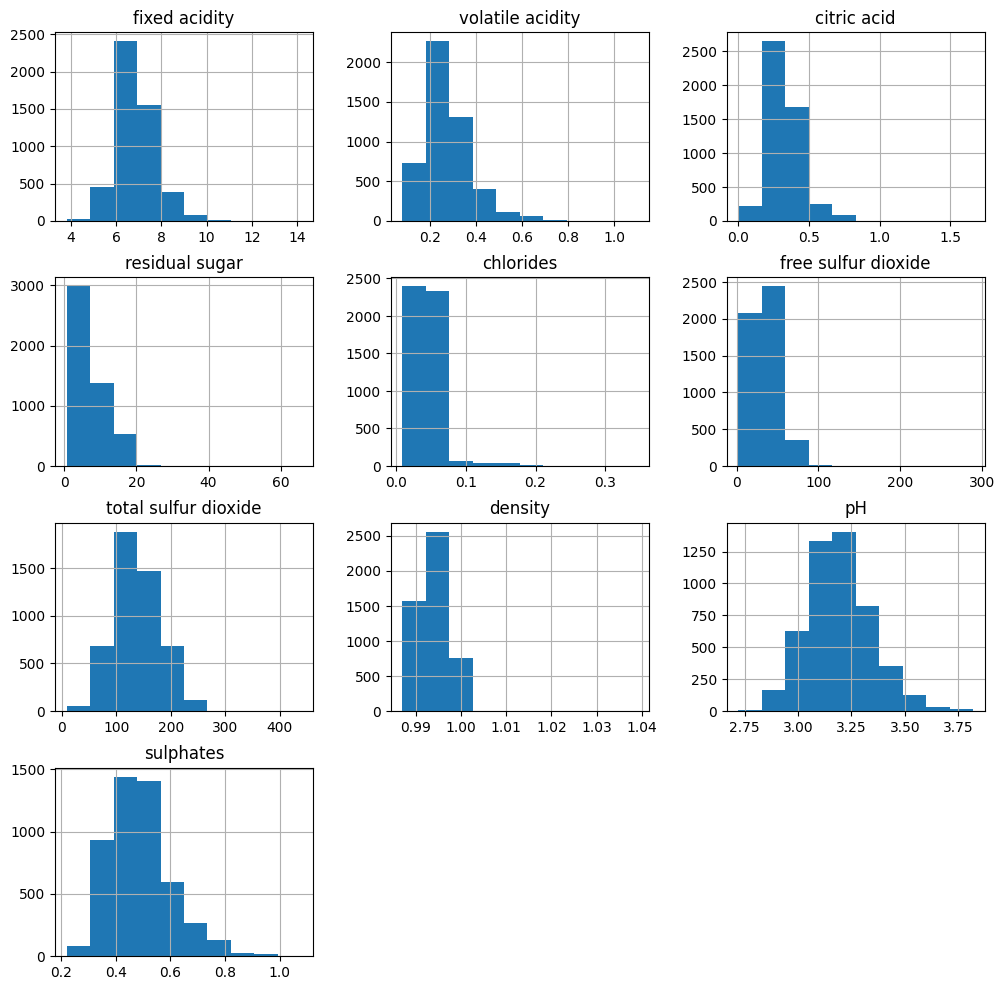

In [168]:
# YOUR CODE HERE

wine_hist = wine[first_10_columns].hist(figsize=(12, 12))


1) Fixed acidity: Positively (right) skewed distribution 

2) Volatile acidity: Positively (right) skewed distribution

3) Citric acid: Positively (right) skewed distribution

4) Residual sugar: Positively (right) skewed distribution

5) Chlorides: Positively (right) skewed distribution

6) Free sulfur dioxide: Positively (right) skewed distribution

7) Total sulfur dioxide: Normal distribution 

8) Density: Normal distribution (Slightly right skewed)

9) pH: Normal distribution (Slightly right skewed)

10) Sulphates: Positively (right) skewed distribution

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

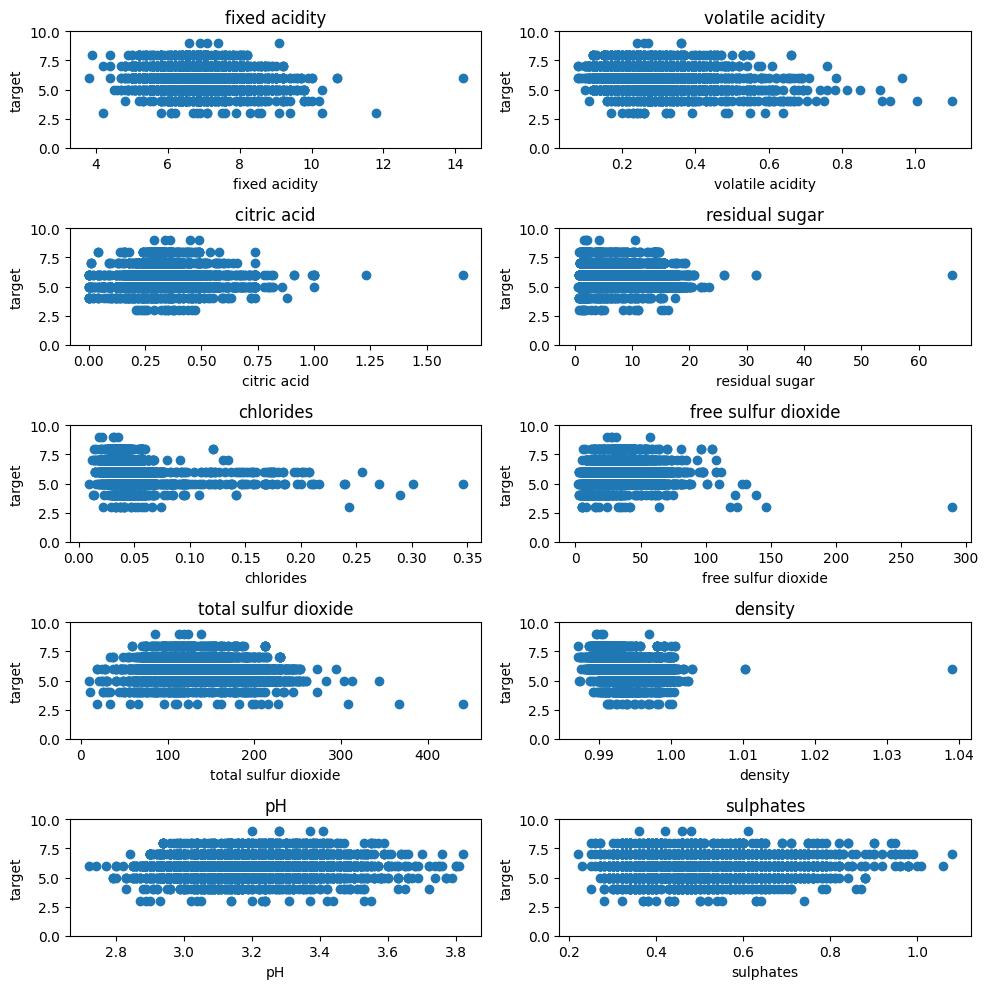

In [169]:
# YOUR CODE HERE

fig, axes = plt.subplots(5, 2, figsize=(10, 10))
axes = axes.flatten()

# fixed acidity
for i, c in enumerate(first_10_columns):
   axes[i].scatter(wine[[c]], wine[['target']])
   axes[i].set_title(c)
   axes[i].set_xlabel(c)
   axes[i].set_ylabel('target')
   axes[i].set_ylim(0, 10)

plt.tight_layout()


Based on these scatter plots, I think it's safe to say that **all of the input columns are independent of the target output column**. I don't see any linear, logistic, exponential, or any other type of trend, pattern or relationship from these plots that indicate that the output column is dependent on any of the input columns above.

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

In [170]:
# YOUR CODE HERE

# all columns except the target

all_input_columns = wine.drop(columns=['target']).columns


X = np.array(wine[all_input_columns], dtype="float")
Y = np.array(wine[['target']], dtype="float")

# build model

model_all_columns = sklearn.linear_model.LinearRegression()
model_all_columns.fit(X, Y)

# Y predictions

predictions = model_all_columns.predict(X)

# find mean squared error 
mean_sq_error = sum((actual[0] - pred[0]) ** 2 for actual, pred in zip(Y, predictions)) / len(Y)


print(f'Mean squared error: {mean_sq_error}')


Mean squared error: 0.5631540629886574


Text(0, 0.5, 'Predictions')

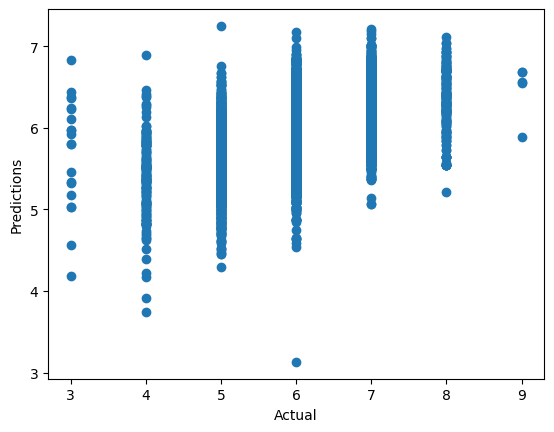

In [171]:
plt.scatter(Y, predictions)
plt.xlabel('Actual')
plt.ylabel('Predictions')

The **mean squared error** of the model is 0.5631540629886574. 



### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


Text(0, 0.5, 'Predictions')

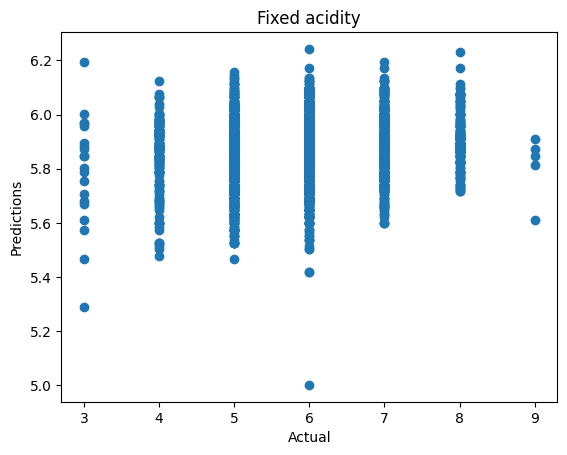

In [191]:
# YOUR CODE HERE

# Fixed acidity

fixed_acidity = np.array(wine[['fixed acidity']], dtype="float")

model_fixed_acidity = sklearn.linear_model.LinearRegression()
model_fixed_acidity.fit(fixed_acidity, Y)

pred_fixed_acidity = model_fixed_acidity.predict(fixed_acidity)


plt.scatter(Y, pred_fixed_acidity)
plt.title('Fixed acidity')
plt.xlabel('Actual')
plt.ylabel('Predictions')



Text(0, 0.5, 'Predictions')

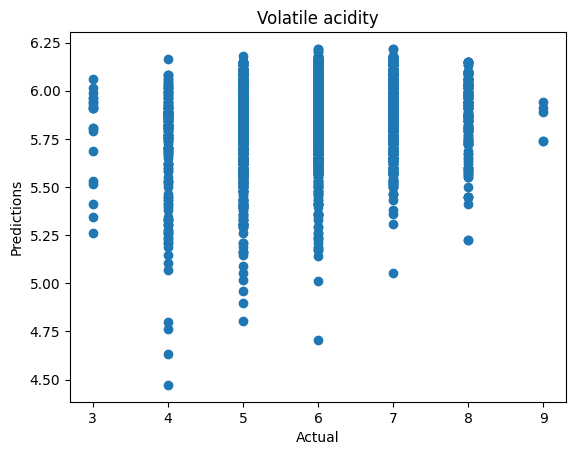

In [173]:
# Volatile acidity

volatile_acidity = np.array(wine[['volatile acidity']], dtype="float")

model_volatile_acidity = sklearn.linear_model.LinearRegression()
model_volatile_acidity.fit(volatile_acidity, Y)


pred_volatile_acidity = model_volatile_acidity.predict(volatile_acidity)


plt.scatter(Y, pred_volatile_acidity)
plt.title('Volatile acidity')
plt.xlabel('Actual')
plt.ylabel('Predictions')



Text(0, 0.5, 'Predictions')

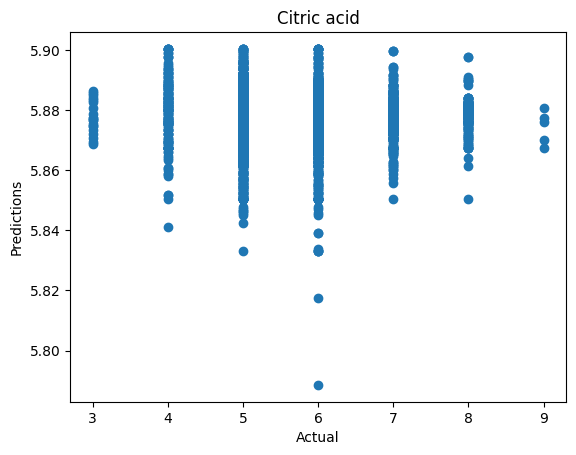

In [174]:
# Citric acid

citric_acid = np.array(wine[['citric acid']], dtype="float")

model_citric_acid = sklearn.linear_model.LinearRegression()
model_citric_acid.fit(citric_acid, Y)

pred_citric_acid = model_citric_acid.predict(citric_acid)


plt.scatter(Y, pred_citric_acid)
plt.title('Citric acid')
plt.xlabel('Actual')
plt.ylabel('Predictions')


Text(0, 0.5, 'Predictions')

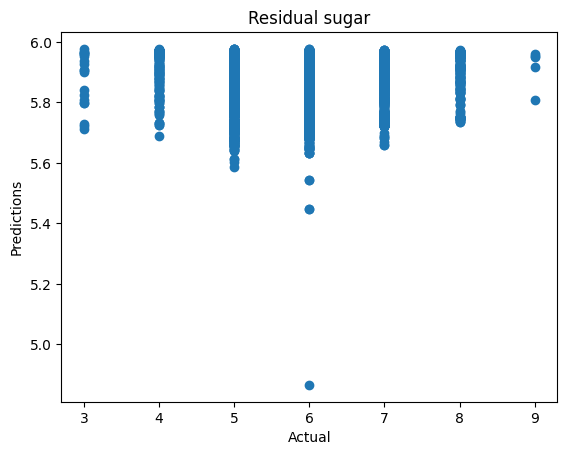

In [175]:
# Residual sugar

res_sugar = np.array(wine[['residual sugar']], dtype="float")

model_res_sugar = sklearn.linear_model.LinearRegression()
model_res_sugar.fit(res_sugar, Y)

pred_res_sugar = model_res_sugar.predict(res_sugar)


plt.scatter(Y, pred_res_sugar)
plt.title('Residual sugar')
plt.xlabel('Actual')
plt.ylabel('Predictions')



Text(0, 0.5, 'Predictions')

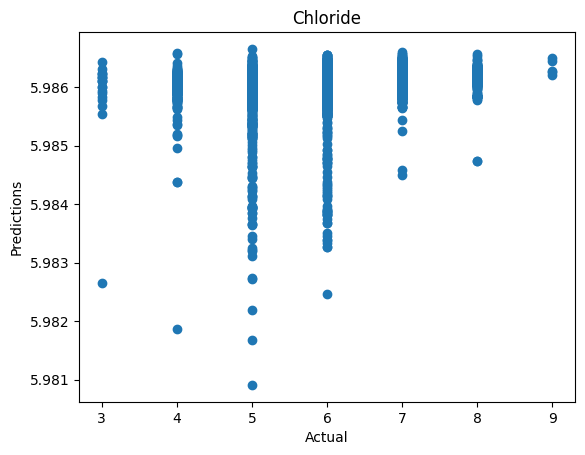

In [176]:
# Chlorides

chlor = np.array(wine[['chlorides']], dtype="float")

model_chlor = sklearn.linear_model.LinearRegression()
model_chlor.fit(res_sugar, Y)

pred_chlor = model_chlor.predict(chlor)


plt.scatter(Y, pred_chlor)
plt.title('Chloride')
plt.xlabel('Actual')
plt.ylabel('Predictions')


Text(0, 0.5, 'Predictions')

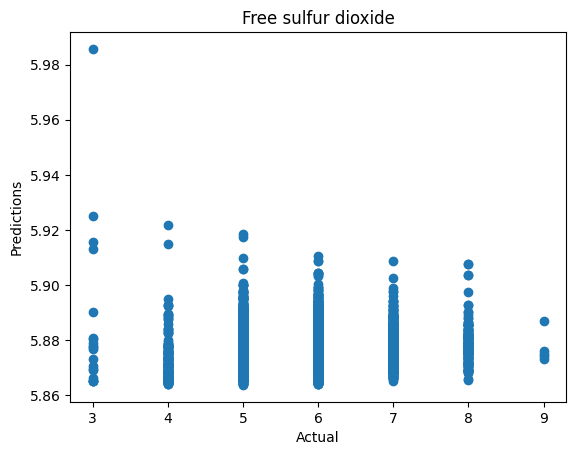

In [177]:
# Free sulfur dioxide

f_so2 = np.array(wine[['free sulfur dioxide']], dtype="float")

model_f_so2 = sklearn.linear_model.LinearRegression()
model_f_so2.fit(f_so2, Y)

pred_f_so2 = model_f_so2.predict(f_so2)


plt.scatter(Y, pred_f_so2)
plt.title('Free sulfur dioxide')
plt.xlabel('Actual')
plt.ylabel('Predictions')



Text(0, 0.5, 'Predictions')

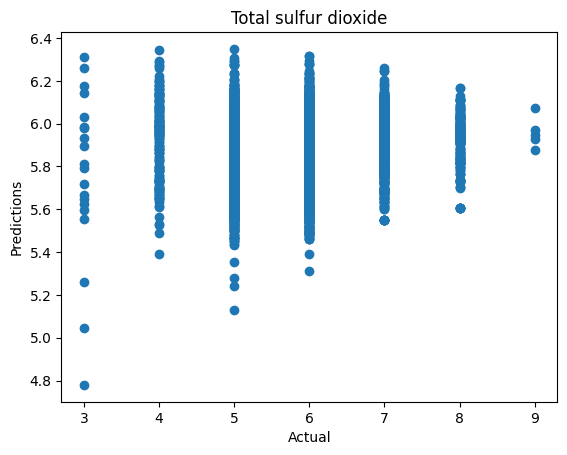

In [178]:
# Total sulfur dioxide

t_so2 = np.array(wine[['total sulfur dioxide']], dtype="float")

model_t_so2 = sklearn.linear_model.LinearRegression()
model_t_so2.fit(t_so2, Y)

pred_t_so2 = model_t_so2.predict(t_so2)


plt.scatter(Y, pred_t_so2)
plt.title('Total sulfur dioxide')
plt.xlabel('Actual')
plt.ylabel('Predictions')




YOUR ANSWERS HERE

Text(0, 0.5, 'Predictions')

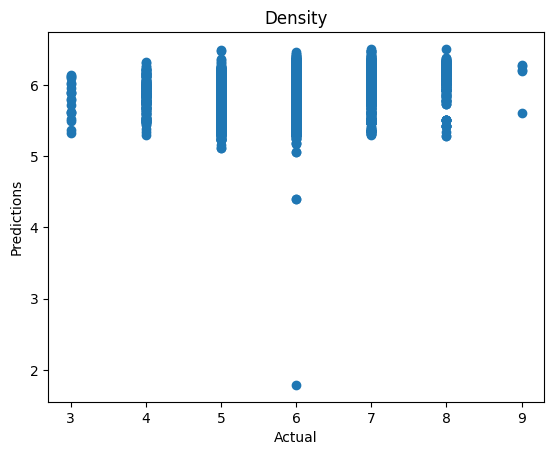

In [179]:
# Density

density = np.array(wine[['density']], dtype="float")

model_density = sklearn.linear_model.LinearRegression()
model_density.fit(density, Y)

pred_density = model_density.predict(density)


plt.scatter(Y, pred_density)
plt.title('Density')
plt.xlabel('Actual')
plt.ylabel('Predictions')

Text(0, 0.5, 'Predictions')

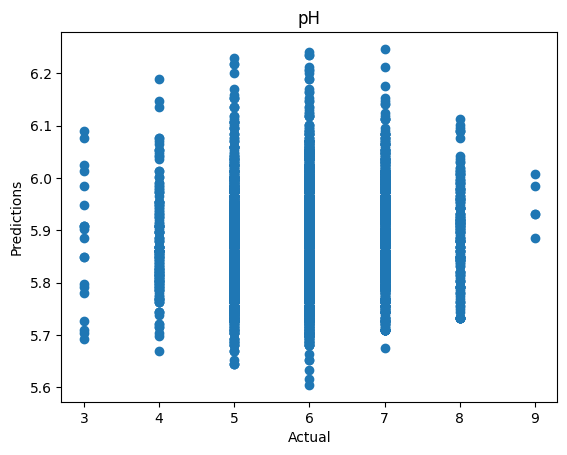

In [189]:
# pH

ph = np.array(wine[['pH']], dtype="float")

model_ph = sklearn.linear_model.LinearRegression()
model_ph.fit(ph, Y)

pred_ph = model_ph.predict(ph)


plt.scatter(Y, pred_ph)
plt.title('pH')
plt.xlabel('Actual')
plt.ylabel('Predictions')



Text(0, 0.5, 'Predictions')

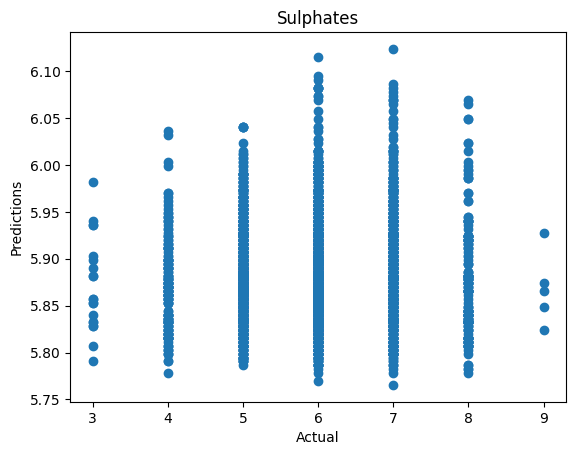

In [181]:
# Sulphates

sul = np.array(wine[['sulphates']], dtype="float")

model_sul = sklearn.linear_model.LinearRegression()
model_sul.fit(sul, Y)

pred_sul = model_sul.predict(sul)


plt.scatter(Y, pred_sul)
plt.title('Sulphates')
plt.xlabel('Actual')
plt.ylabel('Predictions')

Text(0, 0.5, 'Predictions')

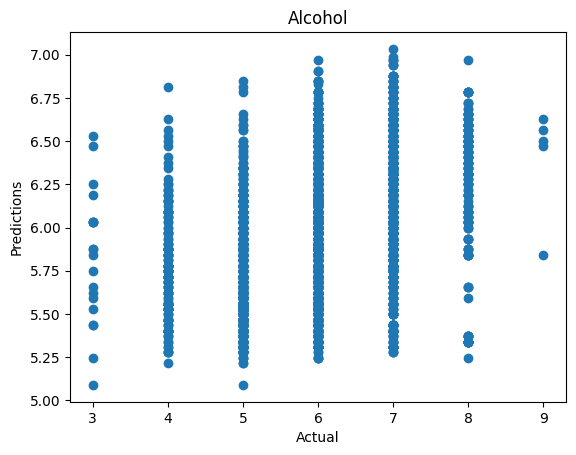

In [182]:
# Alcohol

alcohol = np.array(wine[['alcohol']], dtype="float")

model_alcohol = sklearn.linear_model.LinearRegression()
model_alcohol.fit(alcohol, Y)

pred_alcohol = model_alcohol.predict(alcohol)


plt.scatter(Y, pred_alcohol)
plt.title('Alcohol')
plt.xlabel('Actual')
plt.ylabel('Predictions')

In [188]:
# Correlation Coefficients

print(f'All columns correlation coefficient: {scipy.stats.linregress(X, Y)[2][0]}')
print(f'Fixed acidity correlation coefficient: {scipy.stats.linregress(fixed_acidity, Y)[2][0]}')
print(f'Volatile acidity correlation coefficient: {scipy.stats.linregress(volatile_acidity, Y)[2][0]}')
print(f'Citric acid correlation coefficient: {scipy.stats.linregress(citric_acid, Y)[2][0]}')
print(f'Residual sugar correlation coefficient: {scipy.stats.linregress(res_sugar, Y)[2][0]}')
print(f'Chlorides correlation coefficient: {scipy.stats.linregress(chlor, Y)[2][0]}')
print(f'Free sulfur dioxide correlation coefficient: {scipy.stats.linregress(f_so2, Y)[2][0]}')
print(f'Total sulfur dioxide correlation coefficient: {scipy.stats.linregress(t_so2, Y)[2][0]}')
print(f'Density correlation coefficient: {scipy.stats.linregress(density, Y)[2][0]}')
print(f'pH correlation coefficient: {scipy.stats.linregress(ph, Y)[2][0]}')
print(f'Sulphates correlation coefficient: {scipy.stats.linregress(sul, Y)[2][0]}')
print(f'Alcohol correlation coefficient: {scipy.stats.linregress(alcohol, Y)[2][0]}')



All columns correlation coefficient: -0.11366283071301778
Fixed acidity correlation coefficient: -0.11366283071301778
Volatile acidity correlation coefficient: -0.1947229689211341
Citric acid correlation coefficient: -0.009209090883975405
Residual sugar correlation coefficient: -0.09757682889469307
Chlorides correlation coefficient: -0.20993441094676024
Free sulfur dioxide correlation coefficient: 0.008158067123436048
Total sulfur dioxide correlation coefficient: -0.17473721759706265
Density correlation coefficient: -0.3071233127347302
pH correlation coefficient: 0.09942724573666417
Sulphates correlation coefficient: 0.053677877132792005
Alcohol correlation coefficient: 0.43557471546137244


### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

In [183]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

In [184]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [185]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

In [186]:
# YOUR CODE HERE

YOUR ANSWERS HERE

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE